In [1]:
import warnings
warnings.filterwarnings('ignore')

#################
# My notebook issues
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append('home/egupta/.local/bin')

##############

import os
import numpy as np
import scipy.stats as ss
import networkx as nx
import csv 
import numpy as np
import seaborn as sns
from pandas import DataFrame
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline


##qtensor imports
import qtensor
from qtensor import QAOA_energy
from qtensor import parameter_optimization as popt
import torch

2021-09-16 04:29:12,883- WARNING•	QuickBB solver is unavailable
2021-09-16 04:29:12,885- WARNING•	Tamaki solver is unavailable: No path /home/egupta/.local/lib/python3.7/site-packages/thirdparty/tamaki_treewidth


# Importing Graphs

In [2]:
file2 = open("/home/egupta/Documents/Eesh's Experiments/20_Node_Random_Graphs/20NodeRandomLocalData.txt")
file3 = open("/home/egupta/Documents/Eesh's Experiments/20_Node_Random_Graphs/20NodeRandomGraphs.txt")
g_data = list(np.loadtxt(file2).reshape(55,20,4))
mat_list = list(np.loadtxt(file3).reshape(55,20,20))
def mats_to_graphs(mat_list):
  """
  Given list of adjaceny matrix repr of graphs, converts to actual graphs
  """
  g_list = []
  for mat in mat_list:
    arr = np.array(mat)
    G = nx.convert_matrix.from_numpy_matrix(arr)
    g_list.append(G)
  return g_list
g_list = mats_to_graphs(mat_list)
file4 = open("/home/egupta/Documents/Eesh's Experiments/20_Node_Random_Graphs/New20NodeRandomGraphsData.txt")
file5 = open("/home/egupta/Documents/Eesh's Experiments/20_Node_Random_Graphs/New20NodeRandomGraphs.txt")
g_data_more = np.loadtxt(file4).reshape(55,20,4)
mat_list = np.loadtxt(file5).reshape(55,20,20)
g_list_more = mats_to_graphs(mat_list)
for i in g_data_more:
    g_data.append(i)
for i in g_list_more:
    g_list.append(i)

# Importing Similarity Data

In [50]:
datas = [[],[],[],[]]
for i in range(0,6,1):
#     if i ==2: 
#         print('ho')
# #         for j in range(4):
# #             for k in range(14*110):
# #                 datas[j].append(np.N
    resi = []
    with open('Similarity_110_20_20_data_sep14_Pt'+str(i)+'.csv', 'r', newline = '') as g:
        spamreader = csv.reader(g, quotechar='|')
        j = 0
        for row in spamreader:
            #row = [float(i) for i in row]
            print(len(row))
            for k in row:
                #######
                if k[0] == "[":
                    k = k[1:]
                    k = k[:-1]
                    #print(k)
                
                datas[j].append(float(k))
            j = j+1

110
110
110
110
2310
2310
2310
2310
2420
2420
2420
2420
2420
2420
2420
2420
2420
2420
2420
2420
2420
2420
2420
2420


In [51]:
actual_sim, subgraph_sim = datas[2], datas[3]

# Graphing Similarity Data

In [52]:
float(np.NAN)

nan

In [53]:
from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize

Text(0.5, 0, 'Similarity Metric')

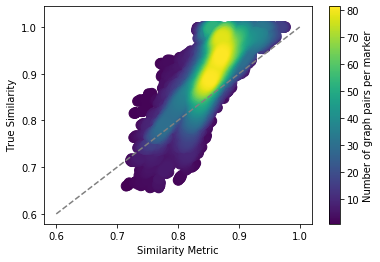

In [54]:
fig , ax = plt.subplots()
# Generate fake data
x = np.copy(subgraph_sim)
y = np.copy(actual_sim)

# for i in range(len(subgraph_sim)):
#     #print(y[i])
#     if y[i] is float(np.NAN):
#         #print('hi')
#         x.remove(x[i])
#         y.remove(y[i])

# print(np.NAN in y)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)


idx = np.argsort(z)
new_x = [x[i] for i in idx]
new_y = [y[i] for i in idx]
new_z = [z[i] for i in idx]


#fig, ax = plt.subplots()
ax.scatter(new_x, new_y, c=new_z, s=100)
#plt.colorbar()
# cbar = plt.colorbar(label = "Number of graph pairs per marker")



norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Number of graph pairs per marker')

######################
low = min(x+y)
ax.plot([0.6, 1], [0.6, 1], color = 'gray', linestyle = '--')

#####################
ax.set_ylabel("True Similarity")#, fontsize = 20)
ax.set_xlabel("Similarity Metric")#, fontsize = 20)

In [55]:
actual_sim, subgraph_sim = datas[2], datas[3]

In [56]:
len(datas[0])

12100

# Parity Analysis

In [68]:
def even_percent(graph):
  """
  Determines the relative percent of even degree nodes
  """
  nodes = graph.number_of_nodes()
  tot_ev = 0
  for i in range(nodes):
    if graph.degree[i]%2 == 0:
      tot_ev+=1
  return tot_ev/nodes


In [69]:
import numpy as np
matrix = np.zeros((11,11,1000))
pointer_matrix = np.zeros((11,11))

In [70]:
full_g_list = g_list

In [71]:
n_graphs = len(full_g_list)
for i in range(110):
  for j in range(110):
    don = even_percent(full_g_list[i])
    don_ind = int((don*10))
    acc = even_percent(full_g_list[j])
    acc_ind = int((acc*10))
    a_sim = actual_sim[i*110 +j]
    if a_sim is float(np.NAN):
        continue

    pointer = int(pointer_matrix[don_ind][acc_ind])
    #pointer = int(pointer)
    # print('#####')
    # print(don)
    # print(acc)
    # print(don_ind)
    # print(acc_ind)
    # print(pointer)
    #print(pointer_matrix[don_ind][acc_ind])
    matrix[don_ind][acc_ind][pointer] = a_sim
    pointer_matrix[don_ind][acc_ind] = pointer + 1    

In [72]:
new_matrix = np.zeros((11,11))
for i in range(11):
  for j in range(11):
    terms = []
    for k in range(int(pointer_matrix[i][j])):
      terms.append(matrix[i][j][k])
    new_matrix[11-j-1][i] = np.mean(terms)

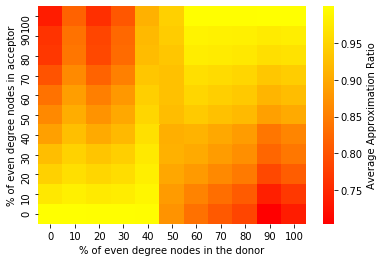

In [73]:
df = DataFrame(new_matrix)  #, index=Index, columns=Cols)
# plt.vlines(grid_lines, 0, n)
# plt.hlines(grid_lines, 0, n)

ax = sns.heatmap(df, annot=False, cmap="autumn",xticklabels=[str(i*10) for i in range(0,11,1)], yticklabels=[str(100 - (i*10)) for i in range(0,11,1)], cbar_kws={'label': 'Average Approximation Ratio'})
plt.xlabel("% of even degree nodes in the donor")
plt.ylabel("% of even degree nodes in acceptor")
#ax.tick_params(left=False, bottom=False) 
plt.show()

# Replacing teh 40% and 50% columns graphs on that 55 parity plot

In [64]:
imp_idx = []
for i in range(110):
    graph = g_list[i]
    k = even_percent(graph)
    if k in [0.4, 0.5]:
        if i>55:
            imp_idx.append(i)
    else:
        if i<55:
            imp_idx.append(i)

In [65]:
imp_idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84]

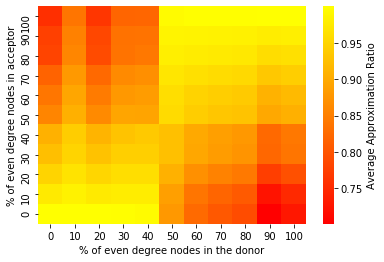

In [67]:
import numpy as np
matrix = np.zeros((11,11,1000))
pointer_matrix = np.zeros((11,11))

##########################################################

n_graphs = len(full_g_list)
for i in range(110):
  for j in range(110):
    if (i not in imp_idx) or (j not in imp_idx):
        continue
    don = even_percent(full_g_list[i])
    don_ind = int((don*10))
    acc = even_percent(full_g_list[j])
    acc_ind = int((acc*10))
    a_sim = actual_sim[i*110 +j]
    if a_sim is float(np.NAN):
        continue

    pointer = int(pointer_matrix[don_ind][acc_ind])
    #pointer = int(pointer)
    # print('#####')
    # print(don)
    # print(acc)
    # print(don_ind)
    # print(acc_ind)
    # print(pointer)
    #print(pointer_matrix[don_ind][acc_ind])
    matrix[don_ind][acc_ind][pointer] = a_sim
    pointer_matrix[don_ind][acc_ind] = pointer + 1    
    
#######################################################################

new_matrix = np.zeros((11,11))
for i in range(11):
  for j in range(11):
    terms = []
    for k in range(int(pointer_matrix[i][j])):
      terms.append(matrix[i][j][k])
    new_matrix[11-j-1][i] = np.mean(terms)
    
##########################################################################

df = DataFrame(new_matrix)  #, index=Index, columns=Cols)
# plt.vlines(grid_lines, 0, n)
# plt.hlines(grid_lines, 0, n)

ax = sns.heatmap(df, annot=False, cmap="autumn",xticklabels=[str(i*10) for i in range(0,11,1)], yticklabels=[str(100 - (i*10)) for i in range(0,11,1)], cbar_kws={'label': 'Average Approximation Ratio'})
plt.xlabel("% of even degree nodes in the donor")
plt.ylabel("% of even degree nodes in acceptor")
#ax.tick_params(left=False, bottom=False) 
plt.show()

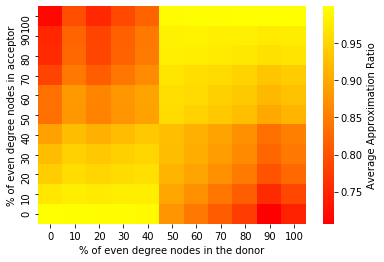

In [74]:
imp_idx = [i for i in range(55, 110, 1)]

#######################################################
import numpy as np
matrix = np.zeros((11,11,1000))
pointer_matrix = np.zeros((11,11))

##########################################################

n_graphs = len(full_g_list)
for i in range(110):
  for j in range(110):
    if (i not in imp_idx) or (j not in imp_idx):
        continue
    don = even_percent(full_g_list[i])
    don_ind = int((don*10))
    acc = even_percent(full_g_list[j])
    acc_ind = int((acc*10))
    a_sim = actual_sim[i*110 +j]
    if a_sim is float(np.NAN):
        continue

    pointer = int(pointer_matrix[don_ind][acc_ind])
    #pointer = int(pointer)
    # print('#####')
    # print(don)
    # print(acc)
    # print(don_ind)
    # print(acc_ind)
    # print(pointer)
    #print(pointer_matrix[don_ind][acc_ind])
    matrix[don_ind][acc_ind][pointer] = a_sim
    pointer_matrix[don_ind][acc_ind] = pointer + 1    
    
#######################################################################

new_matrix = np.zeros((11,11))
for i in range(11):
  for j in range(11):
    terms = []
    for k in range(int(pointer_matrix[i][j])):
      terms.append(matrix[i][j][k])
    new_matrix[11-j-1][i] = np.mean(terms)
    
##########################################################################

df = DataFrame(new_matrix)  #, index=Index, columns=Cols)
# plt.vlines(grid_lines, 0, n)
# plt.hlines(grid_lines, 0, n)

ax = sns.heatmap(df, annot=False, cmap="autumn",xticklabels=[str(i*10) for i in range(0,11,1)], yticklabels=[str(100 - (i*10)) for i in range(0,11,1)], cbar_kws={'label': 'Average Approximation Ratio'})
plt.xlabel("% of even degree nodes in the donor")
plt.ylabel("% of even degree nodes in acceptor")
#ax.tick_params(left=False, bottom=False) 
plt.show()